# T4.1 Árboles de clasificación

# Índice

1. Introducción
2. Aprendizaje de árboles de clasificación
    * Algoritmo básico
    * Criterio de partición
    * Impureza de un nodo
    * Maximización del decremento de impureza

# 1. Introducción

**Árbol de clasificación:** $\;$ estructura jerárquica para la clasificación de objetos.

**Ejemplo:** $\;$ árbol aprendido con el conjunto de entrenamiento $\;\mathcal{D}=\{((1, 1)^t, 1), \, ((2, 4)^t, 2), \, ((5, 1)^t, 1), \, ((5, 4)^t, 1)\}$

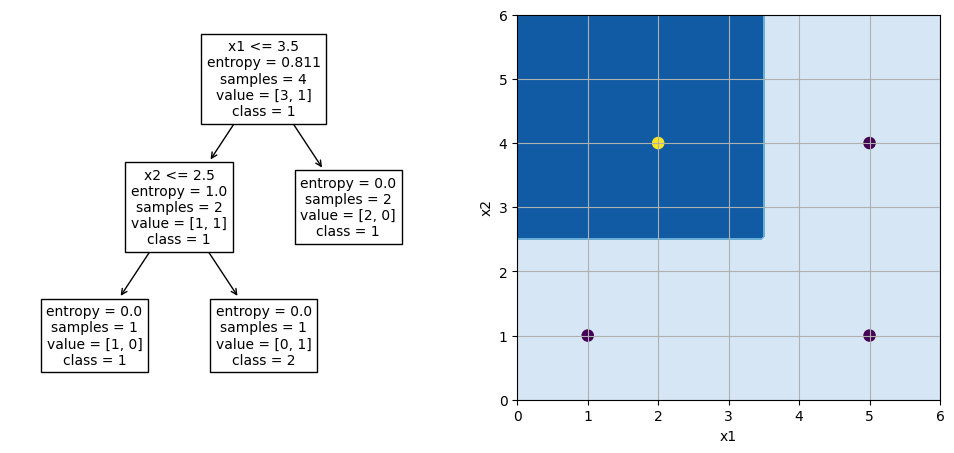

In [4]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[1, 1], [2, 4], [5, 1], [5, 4]]);
y =  np.array([1, 2, 1, 1]);
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=23).fit(X, y);
fig, axes = plt.subplots(1, 2, figsize=(12, 5));
plot_tree(dt, feature_names=list(('x1', 'x2')), class_names=list(('1', '2')), ax=axes[0], fontsize=10);
xx, yy = np.meshgrid(np.linspace(0, 6, num=100), np.linspace(0, 6, num=100));
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape); 
axes[1].grid();
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); 
axes[1].scatter(*X.T, c=y, s=64);
axes[1].set_xlabel("x1"); axes[1].set_ylabel("x2");

# 2. Aprendizaje de árboles de clasificación

## Algoritmo básico

> `Arbol`($\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}$) <br>
>> $(\mathcal{C},L,R,\Delta \mathcal{I})=\,$`Dicotomiza`$(\mathcal{D})$ <br>
>> `si` $\;\Delta \mathcal{I}<\epsilon\quad$ `devuelve` $\quad$ `Nodo`$($`Moda`$(\{c_n\}), -, -, -)$ <br>
>> `si no` $\qquad\quad$ `devuelve` $\quad$ `Nodo`$(-, \mathcal{C}, $`Arbol`$(L),$`Arbol`$(R), -)$

* **Impureza:** $\;$ asumimos definida alguna medida de impureza de un conjunto de datos.
    * **Conjunto puro:** $\;$ un conjunto con todos los datos de una misma clase tendrá impureza nula.
    * **Conjunto impuro:** $\;$ un conjunto con datos de dos o más clases tendrá impureza positiva.
* **Criterio de partición:** $\;\mathcal{C}$ es el criterio que `Dicotomiza` aplica a $\mathcal{D}$ para partirlo en dos.
* **Partición (split):** $\;L$ (left) y $R$ (right) es la partición de $\mathcal{D}$ que obtiene `Dicotomiza` al aplicar $\mathcal{C}$.
* **Decremento de impureza:** $\;\Delta \mathcal{I}$ es la mejora de calidad obtenida al partir $\mathcal{D}$ en $L$ y $R$, medida como decremento de impureza.
* **Umbral de impureza:** $\;\epsilon$ es el mínimo decremento de impureza que hay que conseguir para que la mejora de calidad se considere significativa.

## Criterio de partición

**Criterio usual:** $\;$ par variable-umbral $(d, r)$ con el cual se obtiene el split de $\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}$
$$L=\{(\boldsymbol{x}_n,c_n): x_{nd}\leq r\}%
\quad\text{y}\quad%
R=\{(\boldsymbol{x}_n,c_n): x_{nd}> r\}$$

**Ejemplo (cont.):** $\;$ partición de $\mathcal{D}=\{((1, 1)^t, 1), ((2, 4)^t, 2), ((5, 1)^t, 1), ((5, 4)^t, 1)\}\;$ con $\;(d,r)=(1, 3.5)$
$$L=\{((1, 1)^t, 1), ((2, 4)^t, 2)\}%
\quad\text{y}\quad%
R=\{((5, 1)^t, 1), ((5, 4)^t, 1)\}$$

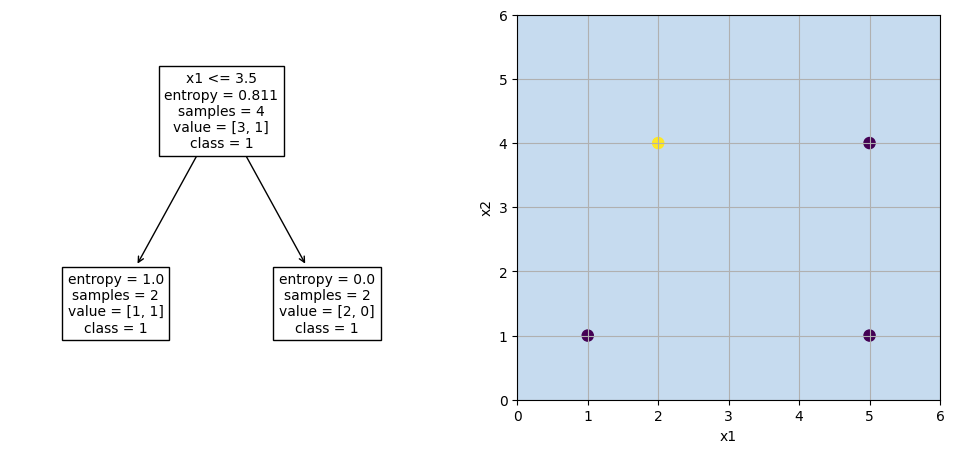

In [5]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[1, 1], [2, 4], [5, 1], [5, 4]]); y =  np.array([1, 2, 1, 1])
dt_depth1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_tree(dt_depth1, feature_names=list(('x1', 'x2')), class_names=list(('1', '2')), ax=axes[0], fontsize=10);
xx, yy = np.meshgrid(np.linspace(0, 6, num=100), np.linspace(0, 6, num=100))
Z = dt_depth1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape); axes[1].grid()
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); 
axes[1].scatter(*X.T, c=y, s=64);
axes[1].set_xlabel("x1"); axes[1].set_ylabel("x2");

## Impureza de un nodo

**Impureza de un nodo $t$:** $\;$ medida de la incertidumbre sobre la clase de los objetos en $t$

**Medida de impureza usual:** $\;$ **entropía** de la distribución empírica de la probabilidad a posteriori de las clases en $t$
$$\mathcal{I}(t) = - \sum_{c=1}^C \hat{P}(c\mid t)\,\log_2 \hat{P}(c\mid t)
\quad\text{donde}\quad%
\hat{P}(c\mid t)=\frac{N_c(t)}{N(t)}$$

**Ejemplo (cont.):** $\;$ asumimos $\;0\log_2 0=0$
$$\begin{align*}
\mathcal{I}(\mathcal{D})&=-\frac{3}{4}\,\log_2\frac{3}{4}-\frac{1}{4}\,\log_2\frac{1}{4}=0.8113\\
\mathcal{I}(\{((1, 1)^t, 1), ((2, 4)^t, 2)\})&=-\frac{1}{2}\,\log_2\frac{1}{2}-\frac{1}{2}\,\log_2\frac{1}{2}=1\\
\mathcal{I}(\{((5, 1)^t, 1), ((5, 4)^t, 1)\})&=-\frac{2}{2}\,\log_2\frac{2}{2}-\frac{0}{2}\,\log_2\frac{0}{2}=0\\
\mathcal{I}(\{((1, 1)^t, 1)\})&=-\frac{1}{1}\,\log_2\frac{1}{1}-\frac{0}{1}\,\log_2\frac{0}{1}=0\\
\mathcal{I}(\{((2, 4)^t, 2)\})&=-\frac{0}{1}\,\log_2\frac{0}{1}-\frac{1}{1}\,\log_2\frac{1}{1}=0
\end{align*}$$

In [3]:
import numpy as np
entropy = lambda x: np.sum(-x * np.log2(x, out=np.zeros_like(x), where=(x!=0)))
I_root = entropy(np.array([3/4, 1/4]));     print(round(I_root, 4))
I_root_L = entropy(np.array([1/2, 1/2]));   print(round(I_root_L, 4))
I_root_R = entropy(np.array([2/2, 0/2]));   print(round(I_root_R, 4))
I_root_L_L = entropy(np.array([1/1, 0/1])); print(round(I_root_L_L, 4))
I_root_L_R = entropy(np.array([0/1, 1/1])); print(round(I_root_L_R, 4))

0.8113
1.0
0.0
0.0
0.0


## Maximización del decremento de impureza

**Maximización del decremento de impureza:** $\;$ asumimos que la partición de un nodo $t$ se realiza buscando un par
variable-umbral con el cual conseguimos un máximo decremento de impureza
$$(d^*,r^*) = \operatorname*{argmax}_{d, r} \; \Delta\mathcal{I}(d,r)%
\qquad\text{con}\qquad%
\Delta\mathcal{I}(d,r)=\mathcal{I}(t)-\frac{N(L(t))}{N(t)}\mathcal{I}(L(t))-\frac{N(R(t))}{N(t)}\mathcal{I}(R(t))$$

**Ejemplo (cont.):** $\;$ decremento de impureza del nodo raíz con $(d,r)=(1,3.5)$
$$\Delta\mathcal{I}(1,3.5)=0.8113-\frac{2}{4}\cdot 1-\frac{2}{4}\cdot 0 = 0.8113 - 0.50= 0.3113$$